# 8. 案例2：预测体积模量

步骤：
1. 载入并检查数据集。
2. 使用matminer添加描述符到数据框架。
3. 使用scikit-learn进行训练、比较，并使用matminer FigRecipes可视化不同机器学习模型的结果。

## 8.1 导入数据集

#### 导入数据

In [1]:
from matminer.datasets import load_dataset
df = load_dataset('elastic_tensor_2015', data_home = '.')
df.head()

,material_id,formula,nsites,space_group,volume,structure,elastic_anisotropy,G_Reuss,G_VRH,G_Voigt,K_Reuss,K_VRH,K_Voigt,poisson_ratio,compliance_tensor,elastic_tensor,elastic_tensor_original,cif,kpoint_density,poscar
0,mp-10003,Nb4CoSi,12,124,194.419802,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",0.030688,96.844535,97.141604,97.438674,194.267623,194.268884,194.270146,0.285701,"[[0.004385293093993, -0.0016070693558990002, -...","[[311.33514638650246, 144.45092552856926, 126....","[[311.33514638650246, 144.45092552856926, 126....",#\#CIF1.1\n###################################...,7000,Nb8 Co2 Si2\n1.0\n6.221780 0.000000 0.000000\n...
1,mp-10010,Al(CoSi)2,5,164,61.987320,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",0.266910,93.939650,96.252006,98.564362,173.647763,175.449907,177.252050,0.268105,"[[0.0037715428949660003, -0.000844229828709, -...","[[306.93357350984974, 88.02634955100905, 105.6...","[[306.93357350984974, 88.02634955100905, 105.6...",#\#CIF1.1\n###################################...,7000,Al1 Co2 Si2\n1.0\n3.932782 0.000000 0.000000\n...
2,mp-10015,SiOs,2,221,25.952539,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",0.756489,120.962289,130.112955,139.263621,295.077545,295.077545,295.077545,0.307780,"[[0.0019959391925840004, -0.000433146670736000...","[[569.5291276937579, 157.8517489654999, 157.85...","[[569.5291276937579, 157.8517489654999, 157.85...",#\#CIF1.1\n###################################...,7000,Si1 Os1\n1.0\n2.960692 0.000000 0.000000\n0.00...
3,mp-10021,Ga,4,63,76.721433,"[[0. 1.09045794 0.84078375] Ga, [0. ...",2.376805,12.205989,15.101901,17.997812,49.025963,49.130670,49.235377,0.360593,"[[0.021647143908635, -0.005207263618160001, -0...","[[69.28798774976904, 34.7875015216915, 37.3877...","[[70.13259066665267, 40.60474945058445, 37.387...",#\#CIF1.1\n###################################...,7000,Ga4\n1.0\n2.803229 0.000000 0.000000\n0.000000...
4,mp-10025,SiRu2,12,62,160.300999,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",0.196930,100.110773,101.947798,103.784823,255.055257,256.768081,258.480904,0.324682,"[[0.00410214297725, -0.001272204332729, -0.001...","[[349.3767766177825, 186.67131003104407, 176.4...","[[407.4791016459293, 176.4759188081947, 213.83...",#\#CIF1.1\n###################################...,7000,Si4 Ru8\n1.0\n4.037706 0.000000 0.000000\n0.00...


#### 保留相关列

这里使用K_VRH（体积模量）作为输出作例子，还可以使用G_VRH，elastic_anisotropy，possion_ratio作为输出。

In [2]:
to_keep = ['formula', 'structure', 'K_VRH']
df = df[to_keep]
df.head()

,formula,structure,K_VRH
0,Nb4CoSi,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",194.268884
1,Al(CoSi)2,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",175.449907
2,SiOs,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",295.077545
3,Ga,"[[0. 1.09045794 0.84078375] Ga, [0. ...",49.130670
4,SiRu2,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",256.768081


## 8.2 加入描述符

#### 添加基础特征

In [3]:
from matminer.featurizers.conversions import StrToComposition
df = StrToComposition().featurize_dataframe(df, 'formula')
df.head()

StrToComposition:   0%|          | 0/1181 [00:00<?, ?it/s]

,formula,structure,K_VRH,composition
0,Nb4CoSi,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",194.268884,"(Nb, Co, Si)"
1,Al(CoSi)2,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",175.449907,"(Al, Co, Si)"
2,SiOs,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",295.077545,"(Si, Os)"
3,Ga,"[[0. 1.09045794 0.84078375] Ga, [0. ...",49.130670,(Ga)
4,SiRu2,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",256.768081,"(Si, Ru)"


In [4]:
from matminer.featurizers.composition import ElementProperty
ep_feat = ElementProperty.from_preset(preset_name = 'magpie')
df = ep_feat.featurize_dataframe(df, col_id = 'composition')
df.head()

ElementProperty:   0%|          | 0/1181 [00:00<?, ?it/s]

,formula,structure,K_VRH,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,Nb4CoSi,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",194.268884,"(Nb, Co, Si)",14.0,41.0,27.0,34.166667,9.111111,41.0,...,1.548471,0.258079,0.430131,0.0,194.0,229.0,35.0,222.833333,9.611111,229.0
1,Al(CoSi)2,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",175.449907,"(Al, Co, Si)",13.0,27.0,14.0,19.000000,6.400000,14.0,...,1.548471,0.619388,0.743266,0.0,194.0,227.0,33.0,213.400000,15.520000,194.0
2,SiOs,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",295.077545,"(Si, Os)",14.0,76.0,62.0,45.000000,31.000000,14.0,...,0.000000,0.000000,0.000000,0.0,194.0,227.0,33.0,210.500000,16.500000,194.0
3,Ga,"[[0. 1.09045794 0.84078375] Ga, [0. ...",49.130670,(Ga),31.0,31.0,0.0,31.000000,0.000000,31.0,...,0.000000,0.000000,0.000000,0.0,64.0,64.0,0.0,64.000000,0.000000,64.0
4,SiRu2,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",256.768081,"(Si, Ru)",14.0,44.0,30.0,34.000000,13.333333,44.0,...,0.000000,0.000000,0.000000,0.0,194.0,227.0,33.0,205.000000,14.666667,194.0


#### 添加组分特征

In [5]:
from matminer.featurizers.conversions import CompositionToOxidComposition

df = CompositionToOxidComposition().featurize_dataframe(df, 'composition')

df.head()

CompositionToOxidComposition:   0%|          | 0/1181 [00:00<?, ?it/s]

,formula,structure,K_VRH,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,...,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,composition_oxid
0,Nb4CoSi,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",194.268884,"(Nb, Co, Si)",14.0,41.0,27.0,34.166667,9.111111,41.0,...,0.258079,0.430131,0.0,194.0,229.0,35.0,222.833333,9.611111,229.0,"(Nb0+, Co0+, Si0+)"
1,Al(CoSi)2,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",175.449907,"(Al, Co, Si)",13.0,27.0,14.0,19.000000,6.400000,14.0,...,0.619388,0.743266,0.0,194.0,227.0,33.0,213.400000,15.520000,194.0,"(Al3+, Co2+, Co3+, Si4-)"
2,SiOs,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",295.077545,"(Si, Os)",14.0,76.0,62.0,45.000000,31.000000,14.0,...,0.000000,0.000000,0.0,194.0,227.0,33.0,210.500000,16.500000,194.0,"(Si4-, Os4+)"
3,Ga,"[[0. 1.09045794 0.84078375] Ga, [0. ...",49.130670,(Ga),31.0,31.0,0.0,31.000000,0.000000,31.0,...,0.000000,0.000000,0.0,64.0,64.0,0.0,64.000000,0.000000,64.0,(Ga0+)
4,SiRu2,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",256.768081,"(Si, Ru)",14.0,44.0,30.0,34.000000,13.333333,44.0,...,0.000000,0.000000,0.0,194.0,227.0,33.0,205.000000,14.666667,194.0,"(Si4-, Ru2+)"


In [6]:
from matminer.featurizers.composition import OxidationStates
os_feat = OxidationStates()
df = os_feat.featurize_dataframe(df, 'composition_oxid')

df.head()

OxidationStates:   0%|          | 0/1181 [00:00<?, ?it/s]

,formula,structure,K_VRH,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,...,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,composition_oxid,minimum oxidation state,maximum oxidation state,range oxidation state,std_dev oxidation state
0,Nb4CoSi,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",194.268884,"(Nb, Co, Si)",14.0,41.0,27.0,34.166667,9.111111,41.0,...,229.0,35.0,222.833333,9.611111,229.0,"(Nb0+, Co0+, Si0+)",0,0,0,0.000000
1,Al(CoSi)2,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",175.449907,"(Al, Co, Si)",13.0,27.0,14.0,19.000000,6.400000,14.0,...,227.0,33.0,213.400000,15.520000,194.0,"(Al3+, Co2+, Co3+, Si4-)",-4,3,7,3.872983
2,SiOs,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",295.077545,"(Si, Os)",14.0,76.0,62.0,45.000000,31.000000,14.0,...,227.0,33.0,210.500000,16.500000,194.0,"(Si4-, Os4+)",-4,4,8,5.656854
3,Ga,"[[0. 1.09045794 0.84078375] Ga, [0. ...",49.130670,(Ga),31.0,31.0,0.0,31.000000,0.000000,31.0,...,64.0,0.0,64.000000,0.000000,64.0,(Ga0+),0,0,0,0.000000
4,SiRu2,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",256.768081,"(Si, Ru)",14.0,44.0,30.0,34.000000,13.333333,44.0,...,227.0,33.0,205.000000,14.666667,194.0,"(Si4-, Ru2+)",-4,2,6,4.242641


#### 添加结构特征

In [7]:
from matminer.featurizers.structure import DensityFeatures

df_feat = DensityFeatures()
df = df_feat.featurize_dataframe(df, 'structure')
df.head()

DensityFeatures:   0%|          | 0/1181 [00:00<?, ?it/s]

,formula,structure,K_VRH,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,...,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,composition_oxid,minimum oxidation state,maximum oxidation state,range oxidation state,std_dev oxidation state,density,vpa,packing fraction
0,Nb4CoSi,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",194.268884,"(Nb, Co, Si)",14.0,41.0,27.0,34.166667,9.111111,41.0,...,9.611111,229.0,"(Nb0+, Co0+, Si0+)",0,0,0,0.000000,7.834556,16.201654,0.688834
1,Al(CoSi)2,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",175.449907,"(Al, Co, Si)",13.0,27.0,14.0,19.000000,6.400000,14.0,...,15.520000,194.0,"(Al3+, Co2+, Co3+, Si4-)",-4,3,7,3.872983,5.384968,12.397466,0.644386
2,SiOs,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",295.077545,"(Si, Os)",14.0,76.0,62.0,45.000000,31.000000,14.0,...,16.500000,194.0,"(Si4-, Os4+)",-4,4,8,5.656854,13.968635,12.976265,0.569426
3,Ga,"[[0. 1.09045794 0.84078375] Ga, [0. ...",49.130670,(Ga),31.0,31.0,0.0,31.000000,0.000000,31.0,...,0.000000,64.0,(Ga0+),0,0,0,0.000000,6.036267,19.180359,0.479802
4,SiRu2,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",256.768081,"(Si, Ru)",14.0,44.0,30.0,34.000000,13.333333,44.0,...,14.666667,194.0,"(Si4-, Ru2+)",-4,2,6,4.242641,9.539514,13.358418,0.598395


In [8]:
df_feat.feature_labels()

['density', 'vpa', 'packing fraction']

## 8.3 使输入特征与体积模量相关

#### 定义输入输出

除了非数字数据和输出数据，都作为输入数据。

In [9]:
y = df['K_VRH'].values
excluded = ['K_VRH', 'formula', 'structure', 'composition', 'composition_oxid']
X = df.drop(excluded,axis=1)

print("There are %s possible dedscriptor:\n"%X.shape[1])
print('%s'%X.columns.values)

There are 139 possible dedscriptor:

['MagpieData minimum Number' 'MagpieData maximum Number'
 'MagpieData range Number' 'MagpieData mean Number'
 'MagpieData avg_dev Number' 'MagpieData mode Number'
 'MagpieData minimum MendeleevNumber' 'MagpieData maximum MendeleevNumber'
 'MagpieData range MendeleevNumber' 'MagpieData mean MendeleevNumber'
 'MagpieData avg_dev MendeleevNumber' 'MagpieData mode MendeleevNumber'
 'MagpieData minimum AtomicWeight' 'MagpieData maximum AtomicWeight'
 'MagpieData range AtomicWeight' 'MagpieData mean AtomicWeight'
 'MagpieData avg_dev AtomicWeight' 'MagpieData mode AtomicWeight'
 'MagpieData minimum MeltingT' 'MagpieData maximum MeltingT'
 'MagpieData range MeltingT' 'MagpieData mean MeltingT'
 'MagpieData avg_dev MeltingT' 'MagpieData mode MeltingT'
 'MagpieData minimum Column' 'MagpieData maximum Column'
 'MagpieData range Column' 'MagpieData mean Column'
 'MagpieData avg_dev Column' 'MagpieData mode Column'
 'MagpieData minimum Row' 'MagpieData maximum 

## 8.4 决策树回归

In [10]:
from sklearn import tree
from sklearn.metrics import mean_squared_error
import numpy as np

clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)

print('training R2 =' + str(round(clf.score(X,y), 3)))
print('training RMSE = %.3f' % np.sqrt(mean_squared_error(y_true = y, y_pred = clf.predict(X))))

training R2 =1.0
training RMSE = 0.000


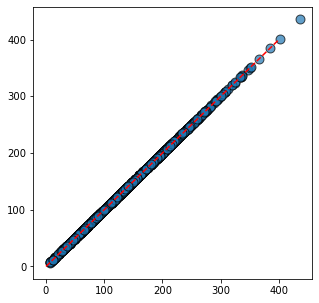

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.plot([0,400], [0, 400], 'r--')
plt.scatter(y, clf.predict(X), s = 80, edgecolor = 'k', alpha = 0.7)

In [12]:
from sklearn.model_selection import KFold, cross_val_score

crossvalidation = KFold(n_splits=10, shuffle=True)
r2_scores = cross_val_score(clf, X, y, scoring = 'r2', cv = crossvalidation)
rmse_scores = cross_val_score(clf, X, y, scoring='neg_root_mean_squared_error', cv=crossvalidation)

print('Cross-validation results:')
print('Folds: %i, mean R2: %.3f' % (len(r2_scores), np.mean(r2_scores)))
print('Folds: %i, mean RMSE: %.3f' % (len(rmse_scores), -np.mean(rmse_scores)))

Cross-validation results:
Folds: 10, mean R2: 0.864
Folds: 10, mean RMSE: 26.312


In [13]:
from sklearn.model_selection import cross_val_predict
y_cv = cross_val_predict(clf, X, y, cv=crossvalidation)

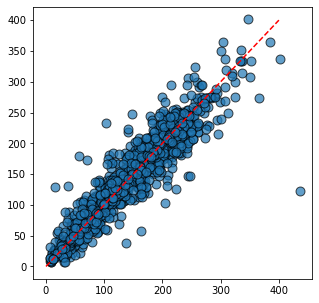

In [14]:
plt.figure(figsize=(5,5))
plt.plot([0,400],[0,400],'r--')
plt.scatter(y, y_cv, s = 80, c = None, edgecolor = 'k', alpha = 0.7)

## 8.5 随机森林回归

### 8.5.1 随机森林回归

random_state：随机数种子，如果不设置则随机选择，每次结果会不一样

In [15]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=50, random_state=1)

rf.fit(X, y)
print('training R2 = ' + str(round(rf.score(X, y), 3)))
print('training RMSE = %.3f' % np.sqrt(mean_squared_error(y_true=y, y_pred=rf.predict(X))))

training R2 = 0.989
training RMSE = 7.669


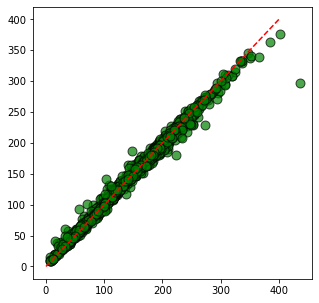

In [16]:
plt.figure(figsize=(5,5))
plt.plot([0,400], [0, 400], 'r--')
plt.scatter(y, rf.predict(X), s = 80, c = 'g', edgecolor = 'k', alpha = 0.7)

### 8.5.2 留出法

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

rf_reg = RandomForestRegressor(n_estimators=50, random_state=1)
rf_reg.fit(X_train, y_train)

print('training R2 = %.3f' % rf_reg.score(X_train, y_train))
print('training RMSE = %.3f' % np.sqrt(mean_squared_error(y_true=y_train, y_pred=rf_reg.predict(X_train))))
print('test R2 = %.3f' % rf_reg.score(X_test, y_test))
print('test RMSE = %.3f' % np.sqrt(mean_squared_error(y_true=y_test, y_pred=rf_reg.predict(X_test))))

training R2 = 0.987
training RMSE = 8.218
test R2 = 0.941
test RMSE = 17.013


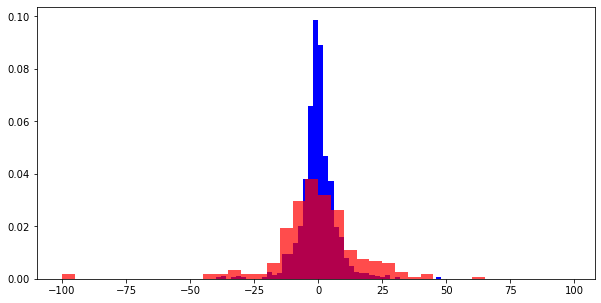

In [18]:
plt.figure(figsize=(10, 5))
plt.hist(y_train-rf_reg.predict(X_train),color='blue',bins = np.arange(-100, 100, 2), density = True)
plt.hist(y_test-rf_reg.predict(X_test),color='red', bins = np.arange(-100, 100, 5), density = True, alpha = 0.7)
plt.show()

### 8.5.3 交叉验证

In [19]:
r2_scores = cross_val_score(rf, X, y, scoring = 'r2', cv = crossvalidation)
rmse_scores = cross_val_score(rf, X, y, scoring='neg_root_mean_squared_error', cv=crossvalidation)

print('Cross-validation results:')
print('Folds: %i, mean R2: %.3f' % (len(r2_scores), np.mean(r2_scores)))
print('Folds: %i, mean RMSE: %.3f' % (len(rmse_scores), -np.mean(rmse_scores)))

Cross-validation results:
Folds: 10, mean R2: 0.927
Folds: 10, mean RMSE: 19.401


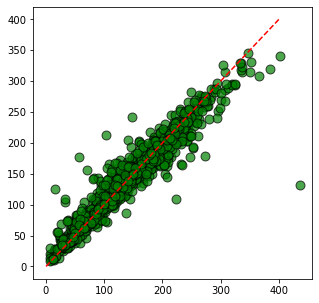

In [20]:
plt.figure(figsize=(5,5))
plt.plot([0,400], [0, 400], 'r--')
plt.scatter(y, cross_val_predict(rf, X, y, cv=crossvalidation), s = 80, c = 'g', edgecolor = 'k', alpha = 0.7)

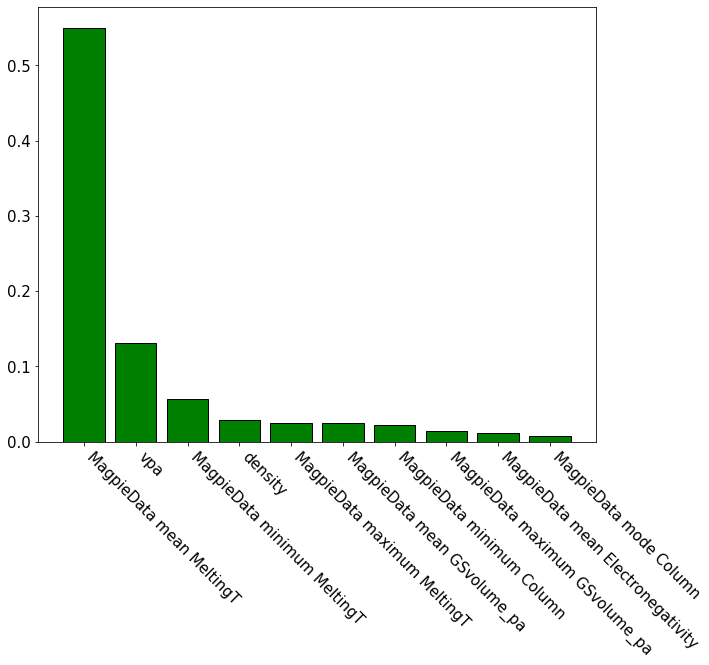

In [21]:
importances = rf.feature_importances_
imp_sort = np.argsort(importances)[::-1]
feat_name = X.columns.values

plt.figure(figsize = (10,8))
plt.bar(x = feat_name[imp_sort][0:10], height = importances[imp_sort][0:10], color = 'g', edgecolor = 'k')
plt.xticks(rotation = -45, fontsize = 15, ha = 'left') # ha 标签对齐方式
plt.yticks(fontsize = 15)
plt.savefig('fig.png')
plt.show()

In [23]:
import matminer
help(matminer.featurizers.composition.thermo)

Help on module matminer.featurizers.composition.thermo in matminer.featurizers.composition:

NAME
    matminer.featurizers.composition.thermo - Composition featurizers for thermodynamic properties.

CLASSES
    matminer.featurizers.base.BaseFeaturizer(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin, abc.ABC)
        CohesiveEnergy
        CohesiveEnergyMP
    
    class CohesiveEnergy(matminer.featurizers.base.BaseFeaturizer)
     |  CohesiveEnergy(mapi_key=None)
     |  
     |  Cohesive energy per atom using elemental cohesive energies and
     |  formation energy.
     |  
     |  Get cohesive energy per atom of a compound by adding known
     |  elemental cohesive energies from the formation energy of the
     |  compound.
     |  
     |  Parameters:
     |      mapi_key (str): Materials API key for looking up formation energy
     |          by composition alone (if you don't set the formation energy
     |          yourself).
     |  
     |  Method resolution order:
 

In [25]:
from matminer.featurizers.composition import thermo
df = thermo.featurize_dataframe(df, 'composition')

df.head()

AttributeError: module 'matminer.featurizers.composition.thermo' has no attribute 'featurize_dataframe'